In [10]:
trans=['loc1','loc2']
trans = '&'.join(trans)
trans

'loc1&loc2'

In [11]:
cnt_loc = {trans: 4, 'loc2&loc3': 2, 'loc1&loc3': 3}
cnt_loc.values()

dict_values([4, 2, 3])

In [12]:
list(cnt_loc.values())

[4, 2, 3]

In [13]:
import numpy as np

In [14]:
sum = np.sum(list(cnt_loc.values()))
sum

9

In [15]:
for key in cnt_loc.keys():
    cnt_loc[key] = cnt_loc[key] / sum

In [16]:
cnt_loc

{'loc1&loc2': 0.4444444444444444,
 'loc2&loc3': 0.2222222222222222,
 'loc1&loc3': 0.3333333333333333}

In [12]:
with open("data/test.txt", "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        print(repr(line))
        if i == 0:
            break

'470\t49bbd6c0f964a520f4531fe3\t4bf58dd8d48988d127951735\tArts & Crafts Store\t40.719810375488535\t-74.00258103213994\t-240\tTue Apr 03 18:00:09 +0000 2012'


In [13]:
with open("data/NYC.txt", "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        print(repr(line))
        if i == 10:
            break

'470\t49bbd6c0f964a520f4531fe3\t4bf58dd8d48988d127951735\tArts & Crafts Store\t40.719810375488535\t-74.00258103213994\t-240\tTue Apr 03 18:00:09 +0000 2012\n'
'979\t4a43c0aef964a520c6a61fe3\t4bf58dd8d48988d1df941735\tBridge\t40.60679958140643\t-74.04416981025437\t-240\tTue Apr 03 18:00:25 +0000 2012\n'
'69\t4c5cc7b485a1e21e00d35711\t4bf58dd8d48988d103941735\tHome (private)\t40.716161684843215\t-73.88307005845945\t-240\tTue Apr 03 18:02:24 +0000 2012\n'
'395\t4bc7086715a7ef3bef9878da\t4bf58dd8d48988d104941735\tMedical Center\t40.7451638\t-73.982518775\t-240\tTue Apr 03 18:02:41 +0000 2012\n'
'87\t4cf2c5321d18a143951b5cec\t4bf58dd8d48988d1cb941735\tFood Truck\t40.74010382743943\t-73.98965835571289\t-240\tTue Apr 03 18:03:00 +0000 2012\n'
'484\t4b5b981bf964a520900929e3\t4bf58dd8d48988d118951735\tFood & Drink Shop\t40.69042711809854\t-73.95468677509598\t-240\tTue Apr 03 18:04:00 +0000 2012\n'
'642\t4ab966c3f964a5203c7f20e3\t4bf58dd8d48988d1e0931735\tCoffee Shop\t40.751591431346306\t-73.974

In [14]:
with open("data/TKY.txt", "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        print(repr(line))
        if i == 10:
            break

'1541\t4f0fd5a8e4b03856eeb6c8cb\t4bf58dd8d48988d10c951735\tCosmetics Shop\t35.705101088587135\t139.6195900440216\t540\tTue Apr 03 18:17:18 +0000 2012\n'
'868\t4b7b884ff964a5207d662fe3\t4bf58dd8d48988d1d1941735\tRamen /  Noodle House\t35.71558112039315\t139.80031728744507\t540\tTue Apr 03 18:22:04 +0000 2012\n'
'114\t4c16fdda96040f477cc473a5\t4d954b0ea243a5684a65b473\tConvenience Store\t35.71454217399564\t139.4800649934587\t540\tTue Apr 03 19:12:07 +0000 2012\n'
'868\t4c178638c2dfc928651ea869\t4bf58dd8d48988d118951735\tFood & Drink Shop\t35.72559198908874\t139.77663259388527\t540\tTue Apr 03 19:12:13 +0000 2012\n'
'1458\t4f568309e4b071452e447afe\t4f2a210c4b9023bd5841ed28\tHousing Development\t35.656083091901124\t139.734045462721\t540\tTue Apr 03 19:18:23 +0000 2012\n'
'1541\t4b83b207f964a5202c0d31e3\t4bf58dd8d48988d1f8941735\tFurniture / Home Store\t35.70507418198042\t139.61950232213246\t540\tTue Apr 03 19:20:09 +0000 2012\n'
'1541\t4ea281c302d529c116a57755\t4d954b0ea243a5684a65b473\tCo

In [23]:
dataset_name = 'NYC'
output_dir = './output/' + dataset_name + '/'
entropy_file = f"{output_dir}{dataset_name}_entropy.txt"
entropy_file

'./output/NYC/NYC_entropy.txt'

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, brentq

### Bayes_Error_Rate Based Method

In [15]:
from dataeval.metrics.estimators import ber

### entropy-based method

#### entropy

In [16]:
def rand_entropy(sequence):
    """
    Compute the "random entropy", that is, the entropy of a uniform distribution.
    Equation:
        S_{rand} = \log_{2}(n), where n is the number of unique symbols in the input sequence.
    Args:
        sequence: 1-D array-like sequence of symbols.
    Returns:
        A float representing the random entropy of the input sequence.
    Reference:
        Limits of Predictability in Human Mobility. Chaoming Song, Zehui Qu,
        Nicholas Blumm1, Albert-László Barabási. Vol. 327, Issue 5968, pp. 1018-1021.
        DOI: 10.1126/science.1177170
    """
    alphabet_size = len(np.unique(sequence))
    return np.log2(alphabet_size)


def unc_entropy(sequence):
    """
    Compute temporal-uncorrelated entropy (Shannon entropy).
    Equation:
    S_{unc} = - \sum p(i) \log_2{p(i)}, for each symbol i in the input sequence.
    Args:
        sequence: the input sequence of symbols.
    Returns:
        temporal-uncorrelated entropy of the input sequence.
    Reference:
        Limits of Predictability in Human Mobility. Chaoming Song, Zehui Qu,
        Nicholas Blumm1, Albert-László Barabási. Vol. 327, Issue 5968, pp. 1018-1021.
        DOI: 10.1126/science.1177170
    """
    _, counts = np.unique(sequence, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

In [17]:
def lambdas_naive(sequence): 
    lambdas = 0 
    n = len(sequence)
    for i in range(n):
        history = ''.join(sequence[0:i])
        k = 1
        found_mismatch = False
        while i + k <= n:
            sub_sequence = ''.join(sequence[i:i+k])
            if sub_sequence in history:
                k += 1
            else:
                found_mismatch = True
                break
        lambda_i = k
        lambdas += lambda_i
    return lambdas

In [18]:
def real_entropy(lambdas, n):
    """
    Estimate the entropy rate of the symbols encoded in the input sequence.

    Equation:
        S_{real} = \left( \frac{1}{n} \sum \Lambda_{i} \right)^{-1}\log_{2}(n)

    Args:
        sequence: the input sequence of symbols.
    Returns:
        A float representing the entropy rate of the input sequence.
    Reference:
        Kontoyiannis, I., Algoet, P. H., Suhov, Y. M., & Wyner, A. J. (1998).
        Nonparametric entropy estimation for stationary processes and random
        fields, with applications to English text. IEEE Transactions on Information
        Theory, 44(3), 1319-1327.
    """
    # return (1.0 * n / lambdas) * np.log(n)
    return (1.0 * n / lambdas) * np.log2(n)

#### max predictability

##### method 1

In [19]:
def compute_f(p,S,N):
    if p<=0 or p>=1 :
        print(p)
    h = -p * np.log2(p) - (1 - p) * np.log2(1 - p)
    # f(p) = h + (1 - p) * np.log2(N - 1) - S
    pi_max = h + (1 - p) * np.log2(N - 1) - S
    return pi_max
def getapproximation(p,S,N) :
    f= compute_f(p,S,N)
    # d1 = f'(p)
    d1 = np.log2(1-p) - np.log2(p) - np.log2(N-1)
    d2 = 1 / ((p-1)*p)
    return f/(d1-f*d2/(2*d1))
def max_predictability(S, N):
    """
    Estimate the maximum predictability of a sequence with
    entropy S and alphabet size N.
    Equation:
    $S = - H(\Pi) + (1 - \Pi)\log(N - 1),$
        where $H(\Pi)$ is given by
    $H(\Pi) = \Pi \log_2(\Pi) + (1 - \Pi) \log_2(1 - \Pi)$
    Args:
        S: the entropy of the input sequence of symbols.
        N: the size of the alphabet (number of unique symbols)
    Returns:
        the maximum predictability of the sequence.
    Reference:
        Limits of Predictability in Human Mobility. Chaoming Song, Zehui Qu,
        Nicholas Blumm1, Albert-László Barabási. Vol. 327, Issue 5968, pp. 1018-1021.
        DOI: 10.1126/science.1177170
    """
    if S>np.log2(N) :
        return 0
    if S<=0.01 :
        return 0.999
    p = (N+1)/(2*N)
    while(abs(compute_f(p,S,N))>0.0000001):
        p = p - 0.8*getapproximation(p,S,N)
    return p

##### method 2

In [11]:
def get_pimax(S, N):
    func = lambda x: -x * np.log2(x) - (1 - x) * np.log2(1 - x) + (1 - x) * (np.log2(N - 1)) - S
    p = (N+1)/(2*N)
    result = fsolve(func, p)
    return result[0]

##### method 3

In [12]:
def compute_f(p, S, N):
    """
    f(p) = -H(p) + (1 - p) * log2(N - 1) - S
    """
    if p <= 0.0 or p >= 1.0:
        return np.nan

    h = -p * np.log2(p) - (1 - p) * np.log2(1 - p)
    return h + (1 - p) * np.log2(N - 1) - S


def max_predictability_brentq(S, N, tol=1e-8):
    """
    Maximum predictability using brentq (guaranteed convergence).
    """
    # trivial / boundary cases (same spirit as original code)
    if S >= np.log2(N):
        return 1.0 / N

    if S <= 0:
        return 1.0

    # strictly inside (0,1)
    eps = 1e-12
    p_min = eps
    p_max = 1.0 - eps

    # brentq requires opposite signs
    f_min = compute_f(p_min, S, N)
    f_max = compute_f(p_max, S, N)

    if np.isnan(f_min) or np.isnan(f_max):
        raise RuntimeError("Invalid function values at boundaries.")

    if f_min * f_max > 0:
        raise RuntimeError("Root not bracketed in (0,1).")

    return brentq(compute_f, p_min, p_max, args=(S, N), xtol=tol)

### 实验

In [20]:
def generate_sequence(q, n, states=['A','B','C']):
    """
    根据给定的转移矩阵生成长度为 n 的历史序列。
    
    参数:
        q: float, 对角线概率
        n: int, 序列长度
        states: list, 状态集，默认 ['A','B','C']
        
    返回:
        sequence: list, 长度为 n 的状态序列
    """
    # 构建转移矩阵
    P = np.array([
        [q, 2/3*(1-q), 1/3*(1-q)],
        [1/3*(1-q), q, 2/3*(1-q)],
        [2/3*(1-q), 1/3*(1-q), q]
    ])
    
    # 初始状态随机选择
    sequence = [np.random.choice(states)]
    
    for _ in range(1, n):
        current_state = sequence[-1]
        current_index = states.index(current_state)
        next_state = np.random.choice(states, p=P[current_index])
        sequence.append(next_state)
    
    return sequence

# 示例
seq = generate_sequence(q=0.6, n=5)
print(seq)

[np.str_('A'), np.str_('C'), np.str_('B'), np.str_('C'), np.str_('A')]


In [22]:
def sequence_to_feature_label(seq, r, state_map=None):
    """
    将离散时间序列转换为特征和标签，适用于贝叶斯错误率计算。
    
    参数：
        seq: list of str, 时间序列 ['A','B','C',...]
        r: int, 截断长度
        state_map: dict, 状态到整数的映射，比如 {'A':0,'B':1,'C':2}
        
    返回：
        X: np.ndarray, shape (num_samples, r), dtype=np.float64
        y: np.ndarray, shape (num_samples,), dtype=np.intp
    """
    if state_map is None:
        unique_states = sorted(set(seq))
        state_map = {s:i for i,s in enumerate(unique_states)}
    
    n = len(seq)
    num_samples = n - r
    X = np.zeros((num_samples, r), dtype=np.float64)
    y = np.zeros(num_samples, dtype=np.intp)
    
    for i in range(num_samples):
        # 历史 r 步作为特征
        X[i, :] = [state_map[s] for s in seq[i:i+r]]
        # 下一步作为标签
        y[i] = state_map[seq[i+r]]
    
    return X, y

# 示例
r = 1
X, y = sequence_to_feature_label(seq, r)
print("Feature:\n", X)
print("Label:\n", y)
print(X.dtype, y.dtype)

Feature:
 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Label:
 [0 0 0 ... 0 0 0]
float64 int64


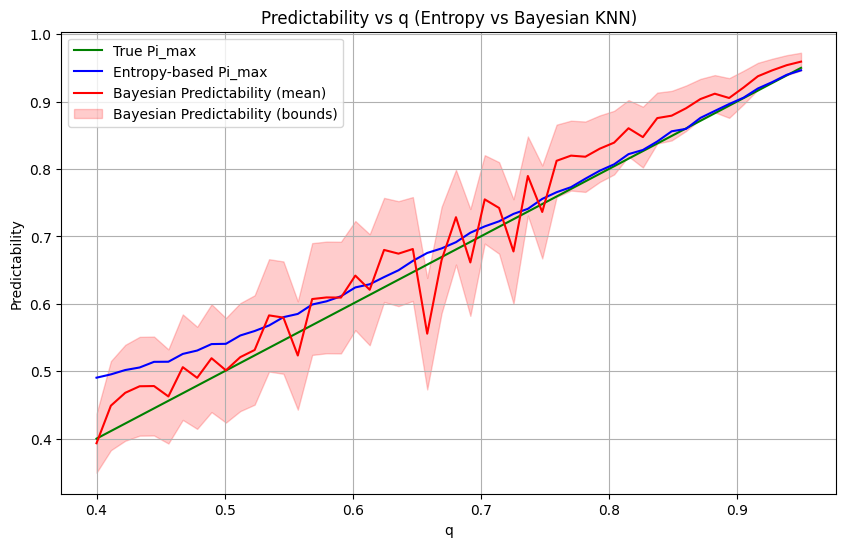

In [26]:
n = 2**15
qs = np.linspace(0.4, 0.95, 50)  # q 值
Pi_entropy = []
BER_upper = []
BER_lower = []
BER_mean = []

r = 3  # 滑动窗口长度

for q in qs:
    seq = generate_sequence(q, n)
    
    # 1️⃣ 基于熵
    lambdas = lambdas_naive(seq)
    H = real_entropy(lambdas, len(seq))
    Pi_max = max_predictability(H, 3)
    Pi_entropy.append(Pi_max)
    
    # 2️⃣ 基于贝叶斯（KNN方法）
    X, y = sequence_to_feature_label(seq, r=r)
    X = X.astype(np.float64)
    y = y.astype(np.intp)
    
    ber_result = ber(X, y, k=5, method="KNN")
    Pi_upper = 1 - ber_result.ber
    Pi_lower = 1 - ber_result.ber_lower
    Pi_mean = (Pi_upper + Pi_lower)/2
    
    BER_upper.append(Pi_upper)
    BER_lower.append(Pi_lower)
    BER_mean.append(Pi_mean)

# 画图
plt.figure(figsize=(10,6))
plt.plot(qs, qs, label="True Pi_max", color='green')
plt.plot(qs, Pi_entropy, label="Entropy-based Pi_max", color='blue')
plt.plot(qs, BER_mean, label="Bayesian Predictability (mean)", color='red')
plt.fill_between(qs, BER_lower, BER_upper, color='red', alpha=0.2, label="Bayesian Predictability (bounds)")
plt.xlabel("q")
plt.ylabel("Predictability")
plt.title("Predictability vs q (Entropy vs Bayesian KNN)")
plt.legend()
plt.grid(True)
plt.show()